In [2]:
import pandas as pd
import numpy as np

path = r"UHT milk P036.csv"
 
df = pd.read_csv(path)
df


,Protein Group,Protein ID,Protein Accession,Peptide,Unique,-10lgP,Mass,Length,ppm,m/z,...,#Feature,#Feature Sample 1,#Feature Sample 2,#Feature Sample 3,#Feature Sample 4,Start,End,PTM,AScore,Found By
0,3,10,P02666,K.YPVEPFTESQSLTLTDVENLHLPLPLLQSWMHQPHQPLPPTVMF...,Y,76.82,6358.2485,56,-1.7,1272.6473,...,20,6,5,3,6,129,184,NaN,NaN,PEAKS DB
1,3,10,P02666,R.DMPIQAFLLYQEPVLGPVRGPFPIIV,Y,75.16,2908.5923,26,-2.9,1455.2933,...,12,3,4,2,3,199,224,NaN,NaN,PEAKS DB
2,3,10,P02666,R.DM(+15.99)PIQAFLLYQEPVLGPVRGPFPIIV,Y,70.64,2924.5874,26,-3.3,1463.2902,...,8,2,2,2,2,199,224,Oxidation (M),M2:Oxidation (M):1000.00,PEAKS DB
3,3,10,P02666,S.QSLTLTDVENLHLPLPLLQSWMHQPHQPLPPTVMFPPQSVLSLS...,Y,70.17,5308.7778,47,-1.4,1328.1945,...,5,2,1,1,1,138,184,NaN,NaN,PEAKS DB
4,3,10,P02666,K.YPVEPFTESQSLTLTDVENLHLPLP.L,Y,69.89,2838.4326,25,-2.1,1420.2148,...,12,4,2,2,4,129,153,NaN,NaN,PEAKS DB
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5372,104,132,A5D9E6,E.TSK(-18.01)GDQLSK.S,Y,25.37,944.4927,9,-9.2,473.2478,...,1,0,0,0,1,151,159,lal,K3:lal:0.00,PEAKS DB
5373,87,123,A7E3W7,M.QAS(-18.01)LDLGTD.K,Y,25.25,900.4189,9,4.5,901.4262,...,1,0,0,1,0,162,170,lal,S3:lal:1000.00,PEAKS DB
5374,86,128,E1BLY0,E.GS(-18.01)K(-18.01)AAGG.G,Y,25.05,510.2550,7,-5.1,511.2567,...,1,1,0,0,0,646,652,lal,S2:lal:1000.00;K3:lal:1000.00,PEAKS DB
5375,91,130,A5D9D1,G.S(-18.01)GIYAPHSP.K,Y,24.64,909.4344,9,10.1,910.4456,...,1,1,0,0,0,224,232,lal,S1:lal:15.21,PEAKS DB


/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0, 0.5, 'Frequency')

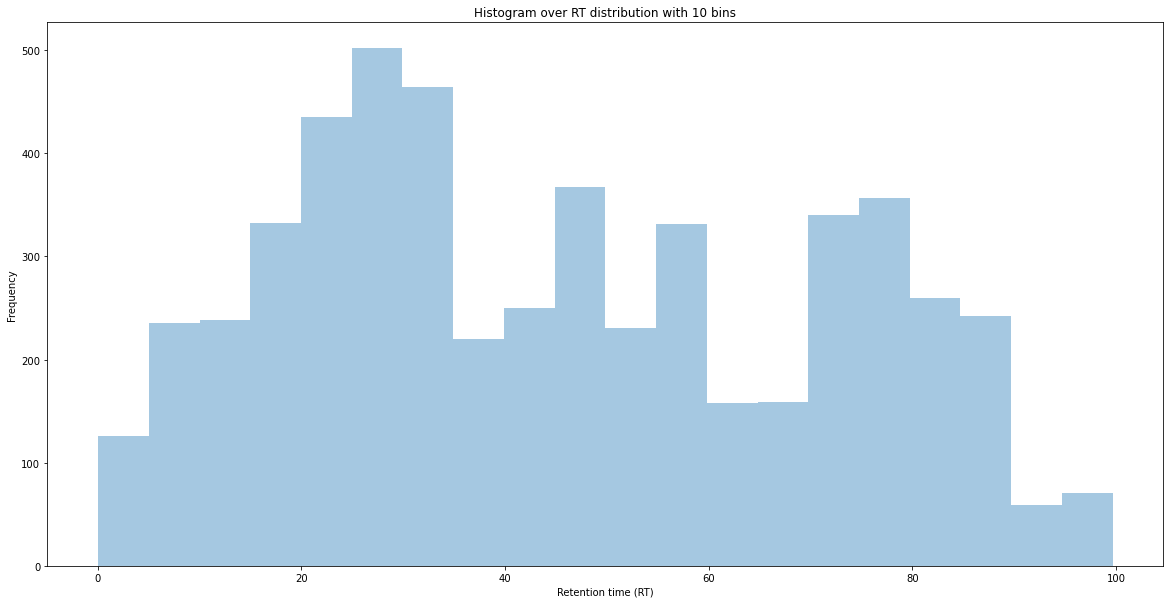

In [3]:
import seaborn as sns
from matplotlib import pyplot as plt

# Distribution Plot (a.k.a. Histogram)
plt.figure(figsize=(20,10))
#sns.distplot(df['RT'], kde=False, hist_kws={"rwidth":0.75,'edgecolor':'black', 'alpha':1.0})
sns.distplot(df['RT'], kde=False)
(n, bins) = np.histogram(df['RT'])
plt.title(f"Histogram over RT distribution with {len(n)} bins")
plt.xlabel('Retention time (RT)')
plt.ylabel('Frequency')

In [4]:
import numpy as np
def count_no_of_modifications(ptm_str):
    #check if NaN value
    if pd.isnull(ptm_str):
        return 0
    return 1 + ptm_str.count(';')

#apply count_no_of_modifications to each PTM column
df['#modifications'] = df['PTM'].apply(count_no_of_modifications)
#print non zero values in modifcations column
df[df['#modifications'] > 0]

,Protein Group,Protein ID,Protein Accession,Peptide,Unique,-10lgP,Mass,Length,ppm,m/z,...,#Feature Sample 1,#Feature Sample 2,#Feature Sample 3,#Feature Sample 4,Start,End,PTM,AScore,Found By,#modifications
2,3,10,P02666,R.DM(+15.99)PIQAFLLYQEPVLGPVRGPFPIIV,Y,70.64,2924.5874,26,-3.3,1463.2902,...,2,2,2,2,199,224,Oxidation (M),M2:Oxidation (M):1000.00,PEAKS DB,1
5,3,10,P02666,K.YPVEPFTESQSLTLTDVENLHLPLPLLQ(+.98)S(-18.01)W...,Y,69.56,6357.2168,56,8.7,1272.4542,...,2,0,1,1,129,184,Deamidation (NQ); lal; Oxidation (M),Q28:Deamidation (NQ):10.19;S29:lal:71.89;M31:O...,PEAKS DB,3
8,3,10,P02666,K.YPVEPFTESQSLTLTDVENLHLPLPLLQSWM(+15.99)HQPHQ...,Y,65.11,6374.2437,56,2.4,1275.8551,...,2,3,0,1,129,184,Oxidation (M),M31:Oxidation (M):111.64,PEAKS DB,1
9,3,10,P02666,A.RELEELNVPGEIVESLS(+79.97)S(+79.97)S(+79.97)E...,Y,64.46,3041.2920,25,-2.1,1521.6434,...,2,2,3,1,16,40,Phosphorylation (STY),S17:Phosphorylation (STY):30.83;S18:Phosphoryl...,PEAKS DB,1
11,3,10,P02666,K.YPVEPFTESQSLTLTDVENLHLPLPLLQSWMHQ(+.98)PHQPL...,Y,63.57,6359.2324,56,0.2,1272.8501,...,0,0,1,0,129,184,Deamidation (NQ),Q33:Deamidation (NQ):10.19,PEAKS DB,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5372,104,132,A5D9E6,E.TSK(-18.01)GDQLSK.S,Y,25.37,944.4927,9,-9.2,473.2478,...,0,0,0,1,151,159,lal,K3:lal:0.00,PEAKS DB,1
5373,87,123,A7E3W7,M.QAS(-18.01)LDLGTD.K,Y,25.25,900.4189,9,4.5,901.4262,...,0,0,1,0,162,170,lal,S3:lal:1000.00,PEAKS DB,1
5374,86,128,E1BLY0,E.GS(-18.01)K(-18.01)AAGG.G,Y,25.05,510.2550,7,-5.1,511.2567,...,1,0,0,0,646,652,lal,S2:lal:1000.00;K3:lal:1000.00,PEAKS DB,1
5375,91,130,A5D9D1,G.S(-18.01)GIYAPHSP.K,Y,24.64,909.4344,9,10.1,910.4456,...,1,0,0,0,224,232,lal,S1:lal:15.21,PEAKS DB,1


Text(0, 0.5, 'Count')

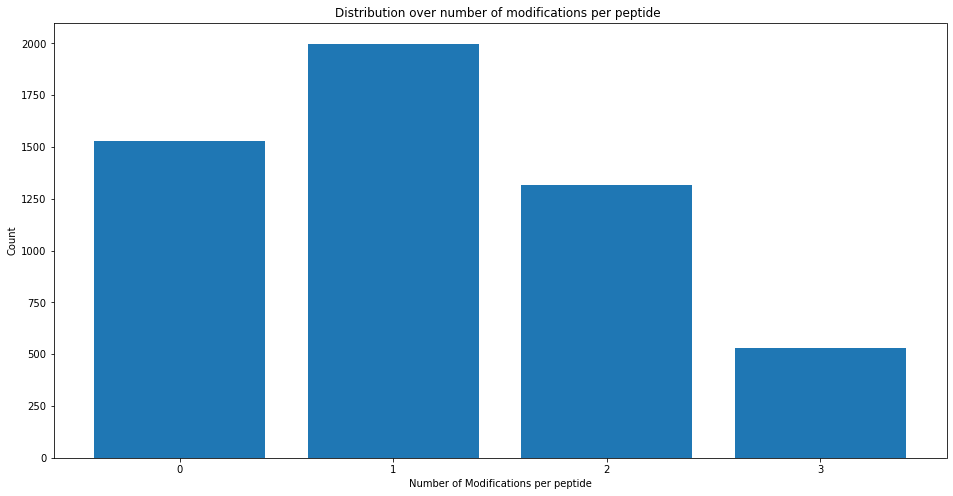

In [5]:

#Column chart (a.k.a. Bar Chart) showing distribution of modifications per peptide
plt.figure(figsize=(16,8))
plt.bar(df['#modifications'].value_counts().index, df['#modifications'].value_counts())
plt.xticks(np.arange(0,4))
plt.title("Distribution over number of modifications per peptide ")
plt.xlabel('Number of Modifications per peptide')
plt.ylabel('Count')

<AxesSubplot:xlabel='#modifications', ylabel='Mass'>

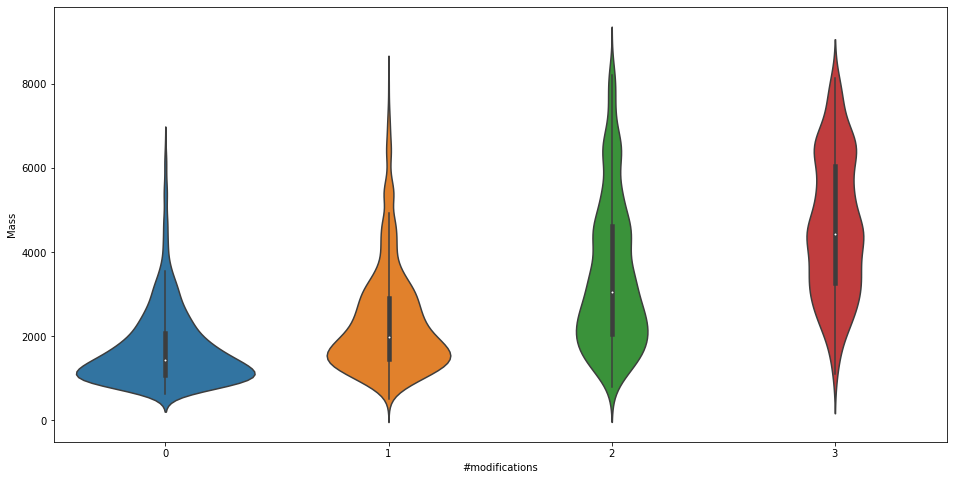

In [6]:
#violin plot showing distribution of number of modifications per peptide vs Mass
plt.figure(figsize=(16,8))
#sns.swarmplot(x='#modifications', y='Mass', data=df )
sns.violinplot(x='#modifications', y='Mass', data=df )

<AxesSubplot:xlabel='#modifications', ylabel='Length'>

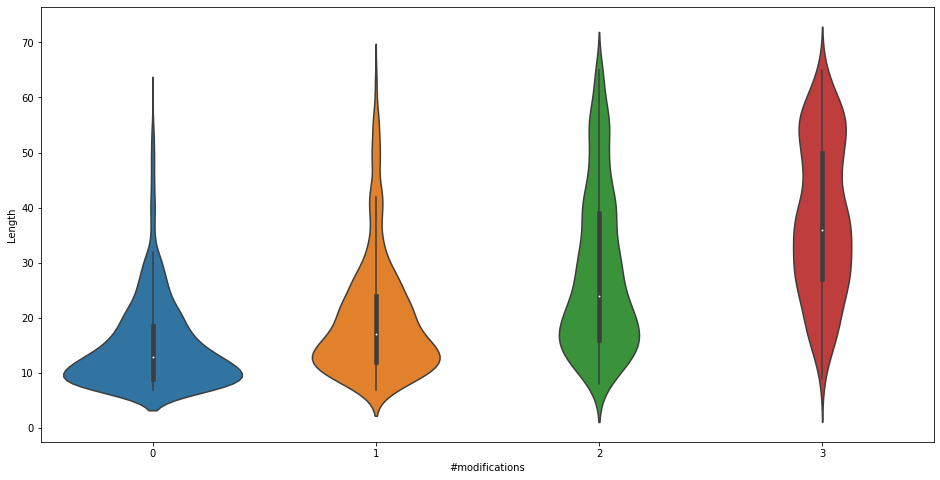

In [7]:
#violin plot showing distribution of number of modifications per peptide vs Length
plt.figure(figsize=(16,8))
sns.violinplot(x='#modifications', y='Length', data=df )


<AxesSubplot:xlabel='#modifications', ylabel='mass/len'>

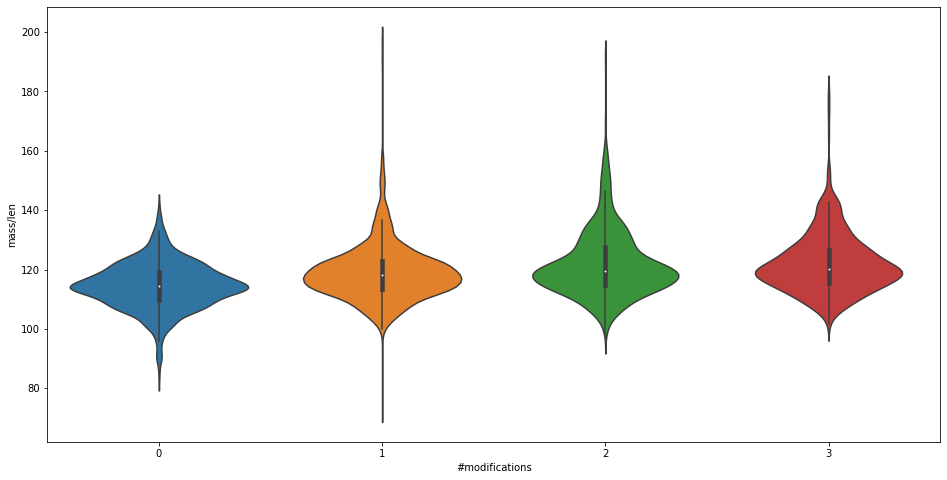

In [8]:
#create new column
df['mass/len']= df['Mass']/df['Length']

#violin plot showing distribution of number of modifications per peptide vs Mass/Length
plt.figure(figsize=(16,8))
sns.violinplot(x='#modifications', y='mass/len', data=df )


<AxesSubplot:xlabel='#modifications', ylabel='mass/len'>

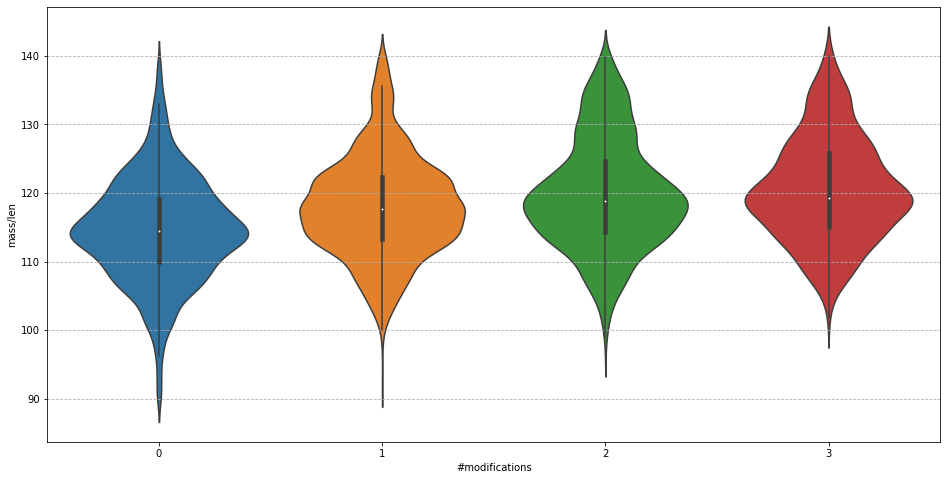

In [9]:
#create new column
df_short_mass = df[df['mass/len'] > 90]
df_short_mass = df_short_mass[df_short_mass['mass/len'] < 140]

#violin plot showing distribution of number of modifications per peptide vs Mass/Length
plt.figure(figsize=(16,8))
plt.grid( linestyle='--')
sns.violinplot(x='#modifications', y='mass/len', data=df_short_mass )


<AxesSubplot:xlabel='#modifications', ylabel='mass/len'>

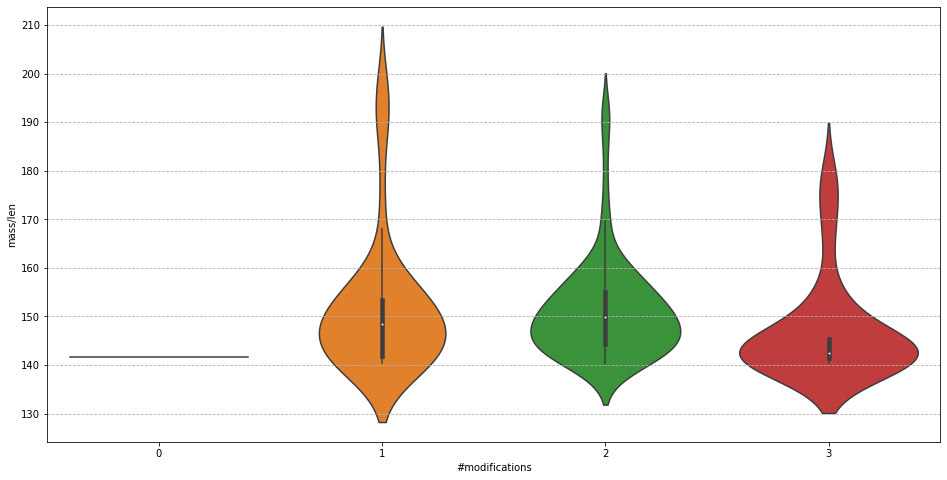

In [10]:
#create new column
df_short_mass2 = df[df['mass/len'] > 140]

#violin plot showing distribution of number of modifications per peptide vs Mass/Length
plt.figure(figsize=(16,8))
plt.grid( linestyle='--')
sns.violinplot(x='#modifications', y='mass/len', data=df_short_mass2 )


In [11]:
plt.figure(figsize=(16,8))
plt.set_xlim(6000,7000)
sns.scatterplot(x='Mass', y='-10lgP', data=df ,hue='#modifications', palette = ['green','orange','dodgerblue','red'], legend='full')

AttributeError: module 'matplotlib.pyplot' has no attribute 'set_xlim'

<Figure size 1152x576 with 0 Axes>

<AxesSubplot:xlabel='None-#modifications', ylabel='Length'>

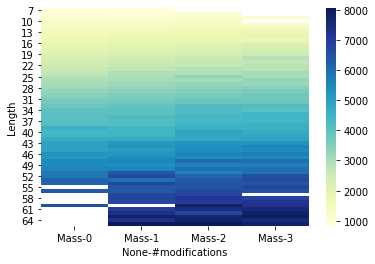

In [ ]:
# _len = df['Length'].to_numpy()
# _mass = df['Mass'].to_numpy()
# _mods = df['#modifications'].to_numpy()
piv = pd.pivot_table(df, index=['Length'], columns=['#modifications'], values=['Mass'], aggfunc=np.mean)
sns.heatmap(piv, fmt="g", cmap="YlGnBu")

<AxesSubplot:xlabel='RT'>

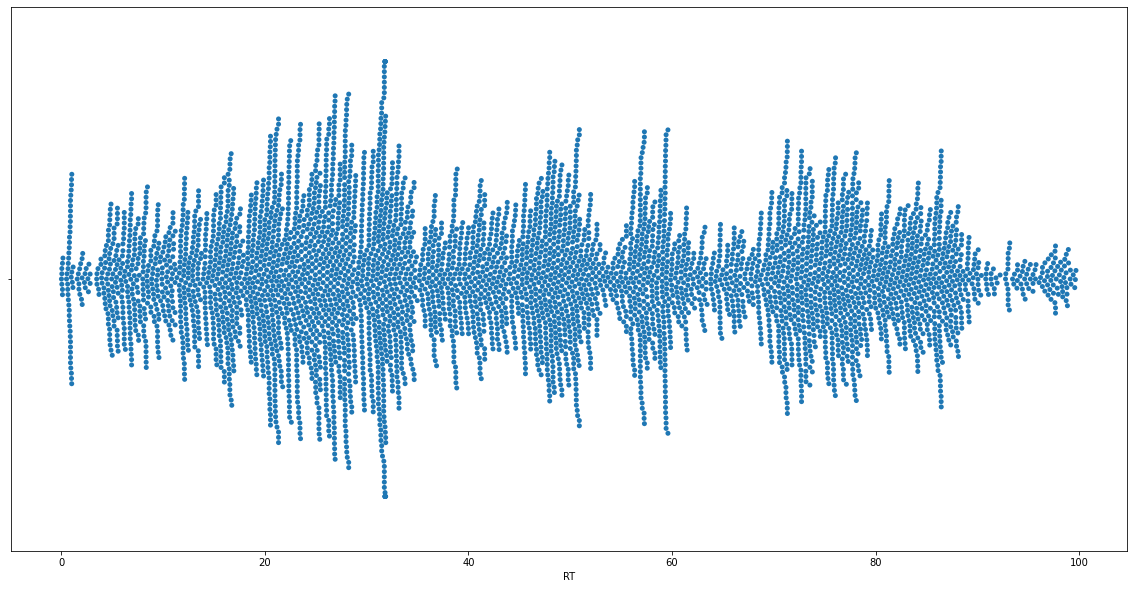

In [ ]:
# Count Plot (a.k.a. Bar Plot)
plt.figure(figsize=(20,10))
sns.swarmplot(x='RT', data=df)


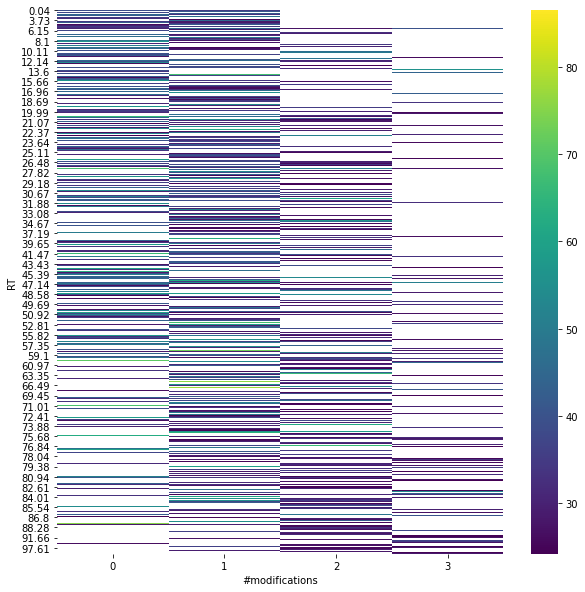

In [ ]:
piv = pd.pivot_table(df, values='-10lgP', index='RT', columns='#modifications')
plt.figure(figsize=(10,10))
sns.heatmap(piv, cmap='viridis')

<AxesSubplot:xlabel='RT'>

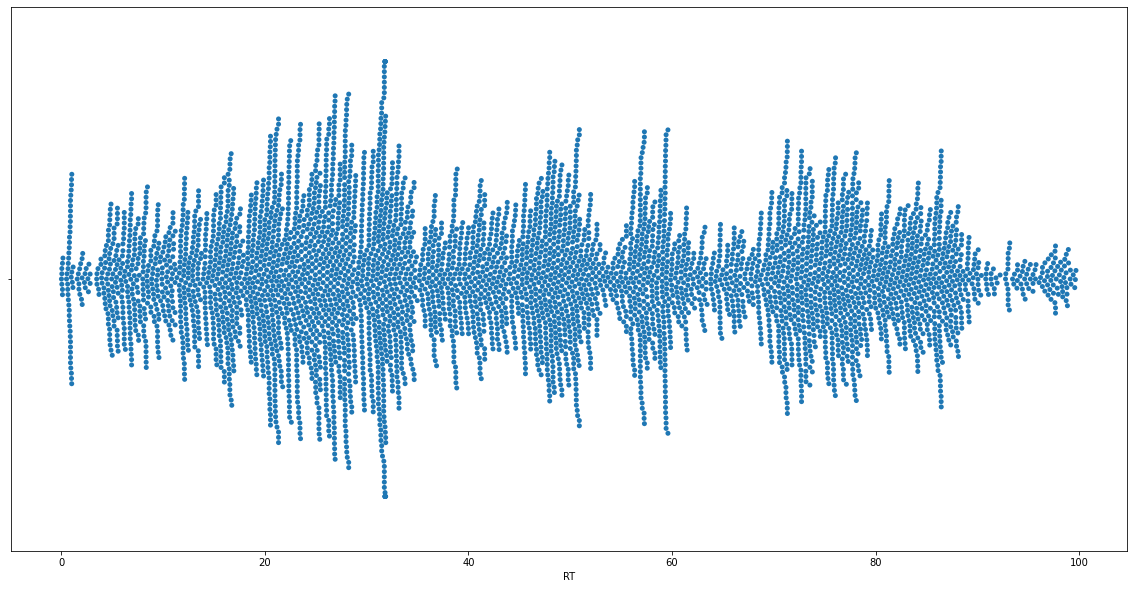

In [ ]:
# Count Plot (a.k.a. Bar Plot) #BEFORE adding modifications
plt.figure(figsize=(20,10))
sns.swarmplot(x='RT', data=df)

Index(['Protein Group', 'Protein Accession', 'Peptide', '-10lgP', 'Mass',
       'Length', 'ppm', 'z', 'RT', 'Area Sample 1', 'Area Sample 2',
       'Area Sample 3', 'Area Sample 4', 'Fraction', '#Feature',
       '#Feature Sample 1', '#Feature Sample 2', '#Feature Sample 3',
       '#Feature Sample 4', 'Start', 'End', 'PTM', 'AScore'],
      dtype='object')
Index(['Protein Group', 'Protein Accession', 'Peptide', '-10lgP', 'Mass',
       'Length', 'ppm', 'z', 'RT', 'Area Sample 1', 'Area Sample 2',
       'Area Sample 3', 'Area Sample 4', 'Fraction', '#Feature',
       '#Feature Sample 1', '#Feature Sample 2', '#Feature Sample 3',
       '#Feature Sample 4', 'Start', 'End', 'PTM', 'AScore'],
      dtype='object')


<AxesSubplot:>

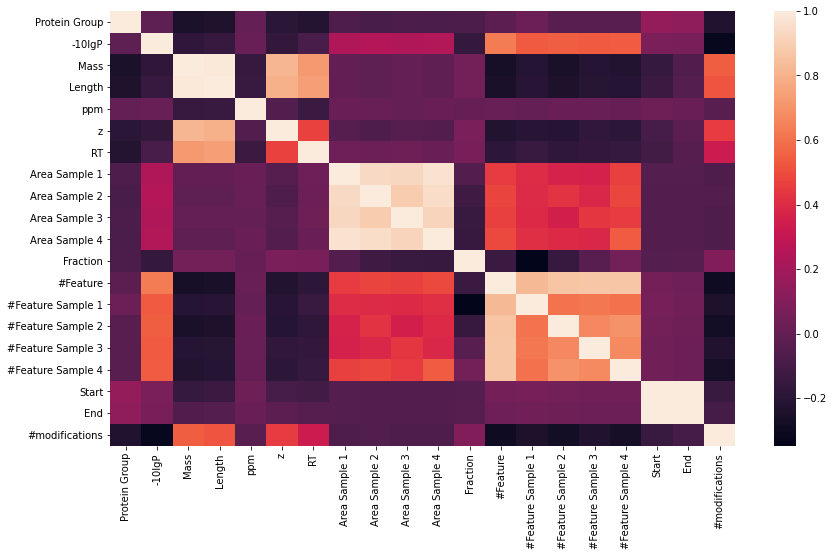

In [ ]:
from utils import get_data_and_remove_unwanted_columns

df_modific = df[df['#modifications'] > 0]
df_unwanted = get_data_and_remove_unwanted_columns()
df_unwanted['#modifications'] = df_unwanted['PTM'].apply(count_no_of_modifications)
plt.figure(figsize=(14,8))
sns.heatmap(df_unwanted.corr())

<AxesSubplot:>

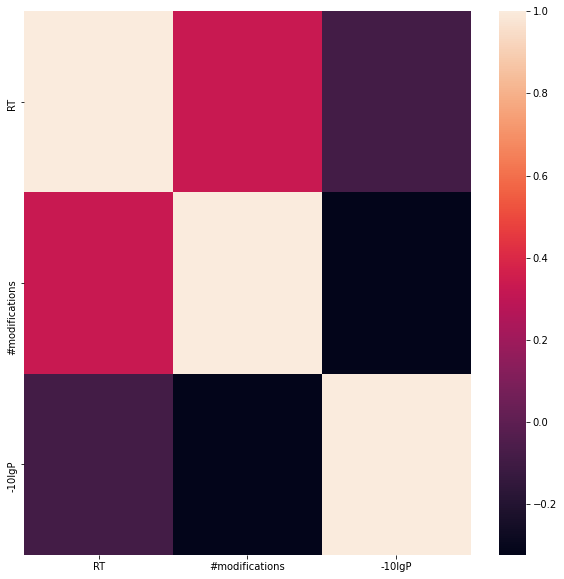

In [ ]:
plt.figure(figsize=(10,10))
sns.heatmap(df_unwanted[['RT','#modifications','-10lgP']].corr())

<AxesSubplot:xlabel='RT', ylabel='-10lgP'>

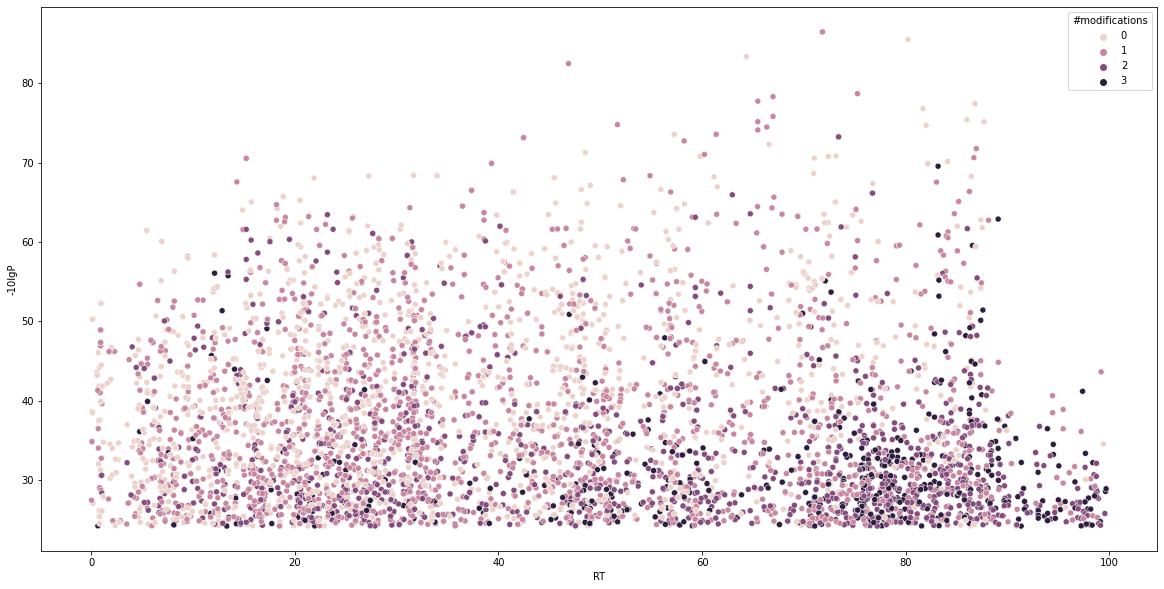

In [ ]:
from matplotlib import pyplot as plt
plt.figure(figsize=(20,10))
sns.scatterplot(y="-10lgP", x="RT", hue = "#modifications", data=df)

Text(0, 0.5, 'Count')

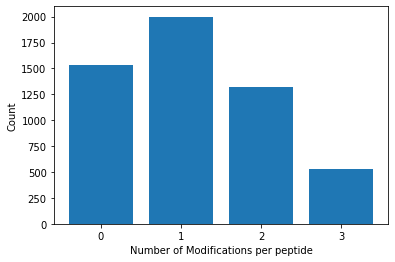

/opt/anaconda3/lib/python3.7/site-packages/seaborn/categorical.py:1296: UserWarning: 8.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
No handles with labels found to put in legend.


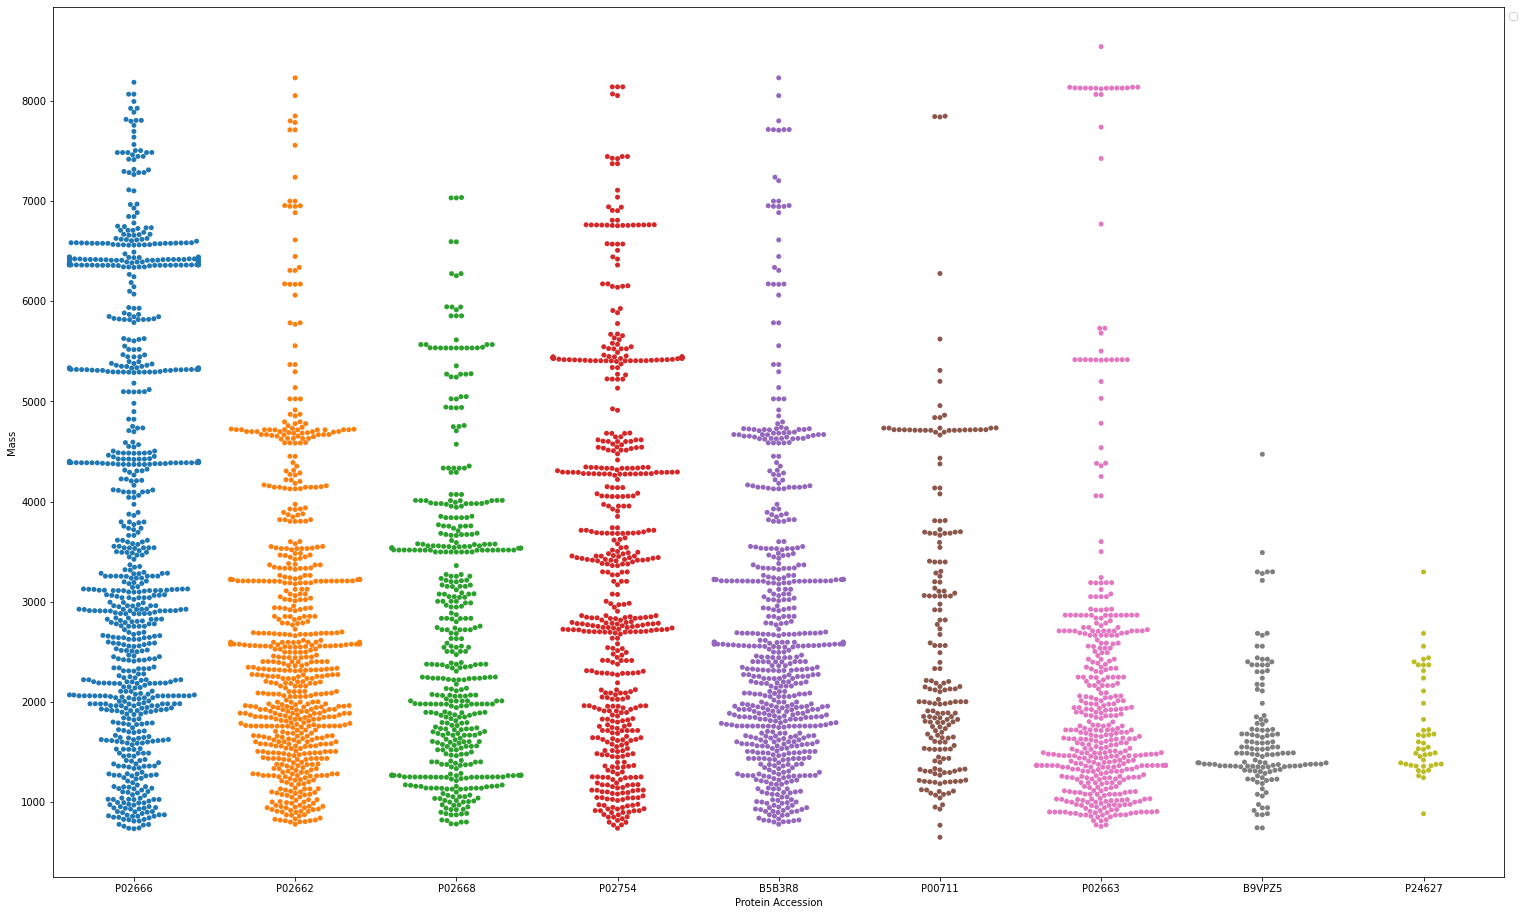

In [ ]:
df_melt = [["Protein Accession", "Mass"]]
df2 = df[:4000]
plt.figure(figsize=(26,16))
sns.swarmplot(x='Protein Accession', y='Mass', data=df2 )
# Place legend to the right
plt.legend(bbox_to_anchor=(1, 1), loc=2)

<AxesSubplot:xlabel='Protein Accession', ylabel='Length'>

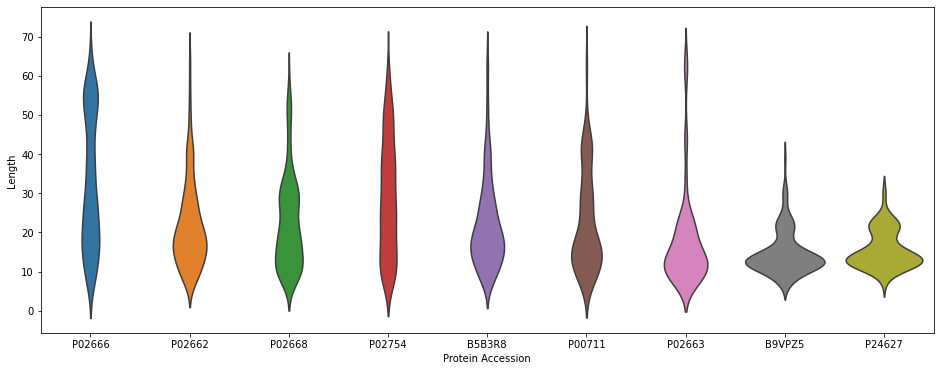

In [ ]:
plt.figure(figsize=(16,6))
sns.violinplot(x='Protein Accession', y='Length', data=df2,
               inner=None) # Remove the bars inside the violins)

KeyboardInterrupt: 

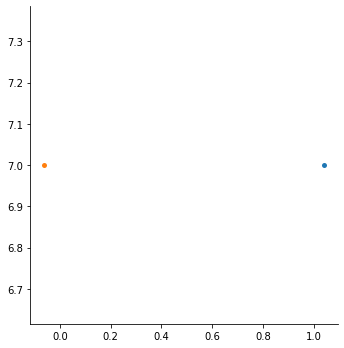

In [ ]:
import seaborn as sns
sns.catplot(x='Mass', 
                   y='Length', 
                   data=df, 
                   hue='#modifications',  # Color by stage
                   col='#modifications') # Separate by stage) # Swarmplot

/opt/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='-10lgP', ylabel='count'>

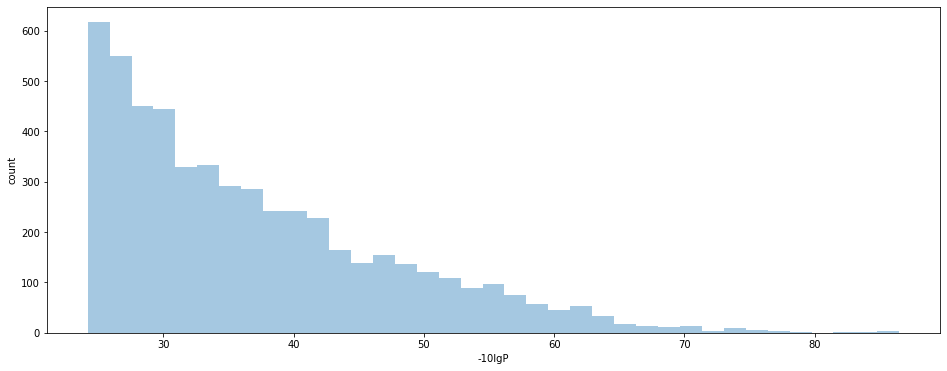

In [ ]:
plt.figure(figsize=(16,6))  
plt.ylabel("count")
sns.distplot(df['-10lgP'], kde=False)

In [ ]:
#import operator
modifications = df["PTM"]
differentModifications = {}
for x in modifications:
    if pd.isnull(x):
        continue
    x = x.strip()
    mods = x.split(";")
    for mod in mods:
        if mod not in differentModifications:
            differentModifications[mod] = 1
        else:
            differentModifications[mod] +=1
differentModifications = dict(sorted(differentModifications.items(), key=lambda item:item[1], reverse=True))
for mod, count in differentModifications.items():
    print("mod is "+mod+" count is "+str(count))

mod is Deamidation (NQ) count is 1308
mod is Phosphorylation (STY) count is 667
mod is  Deamidation (NQ) count is 538
mod is Carbamidomethylation count is 506
mod is  lal count is 379
mod is Lactosylation count is 371
mod is  Phosphorylation (STY) count is 344
mod is lal count is 319
mod is  Lactosylation count is 277
mod is  Oxidation (M) count is 238
mod is Oxidation (M) count is 212
mod is  Carbamidomethylation count is 183
mod is Pyro-glu from Q count is 138
mod is  Dioxidation (M) count is 137
mod is Glycosylation type a count is 112
mod is  Glycosylation type a count is 85
mod is  Glycosylation type b count is 77
mod is lan count is 55
mod is Glycosylation type b count is 53
mod is Dioxidation (M) count is 48
mod is  Glycosylation type c/d count is 44
mod is  lan count is 41
mod is  Glycosylation type e count is 34
mod is Glycosylation type e count is 32
mod is Glycosylation type c/d count is 25


([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

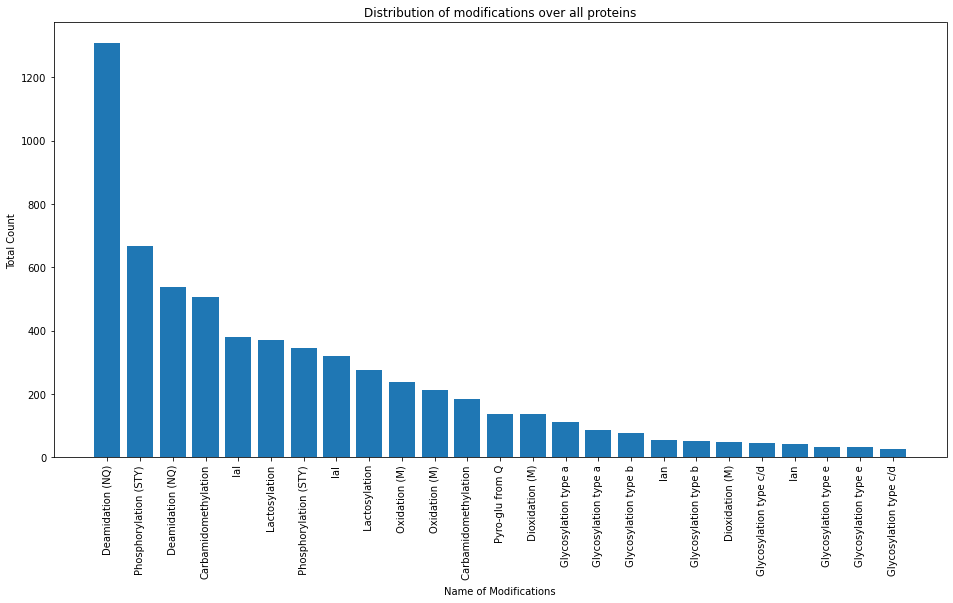

In [ ]:
plt.figure(figsize=(16,8))
plt.bar(differentModifications.keys(), differentModifications.values())
plt.title("Distribution of modifications over all proteins")
plt.xlabel('Name of Modifications')
plt.ylabel('Total Count')
plt.xticks(rotation='vertical')

In [ ]:
modificationsAndProteins = df[["PTM", "Protein Accession"]]
differentModificationsByProtein = {}
for x, proteinId in modificationsAndProteins.itertuples(index=False):
    if pd.isnull(x) or not proteinId:
        continue
    proteinId = proteinId.strip()
    if proteinId not in differentModificationsByProtein:
        differentModificationsByProtein[proteinId] = {}
    mods = x.split(";")
    for mod in mods:
        if mod not in differentModificationsByProtein[proteinId]:
             differentModificationsByProtein[proteinId][mod] = 1
        else:
             differentModificationsByProtein[proteinId][mod] += 1
#differentModificationsByProtein = dict(sorted(differentModificationsByProtein.items(), key=lambda item:len(item[1]), reverse=True))
#for protein, mod in differentModificationsByProtein.items():
#   print("amount of modicitions: "+str(len(mod)))
for protein, mods in differentModificationsByProtein.items():
    differentModificationsByProtein[protein] = dict(sorted(mods.items(), key=lambda item:item[1], reverse=True))
    print(protein)
    #for mod, count in mods.items():
        #print("protein is: " +protein+ "mod is "+mod+" count is "+str(count))

P02666
P02662
P02668
P02754
B5B3R8
P00711
P02663
B9VPZ5
P24627
G9G9X6
P80457
P81265
P18892
Q95114
Q19KS1
P80025
P80195
Q9BDG3
Q9TUM6
P11151
P31096
P26201
B2D1N9
Q4GZT4
Q3ZCL0
P10152
P08037
P60712
Q3ZCH5
Q58DP6
P10790
P02702
P79345
Q9MZ06
Q8WML4
Q5GN72
P30922
A0JNP2
Q56J78
A7E3V7
Q8SPP7
Q0IIA2
Q8MI01
P80209
A7E3Q2
A5D9D2
P26779
C6KGD7
C6KGD9
C6KGD8
B3FXL6
Q58DV6
Q58DU4
E1B8X8
Q2LGB8
Q5W5H1
Q5W5H3
Q5W5I6
Q5W5H6
Q5W5G9
A5D9E6
A7E3W7
E1BLY0
A5D9D1
F1N1K8


([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

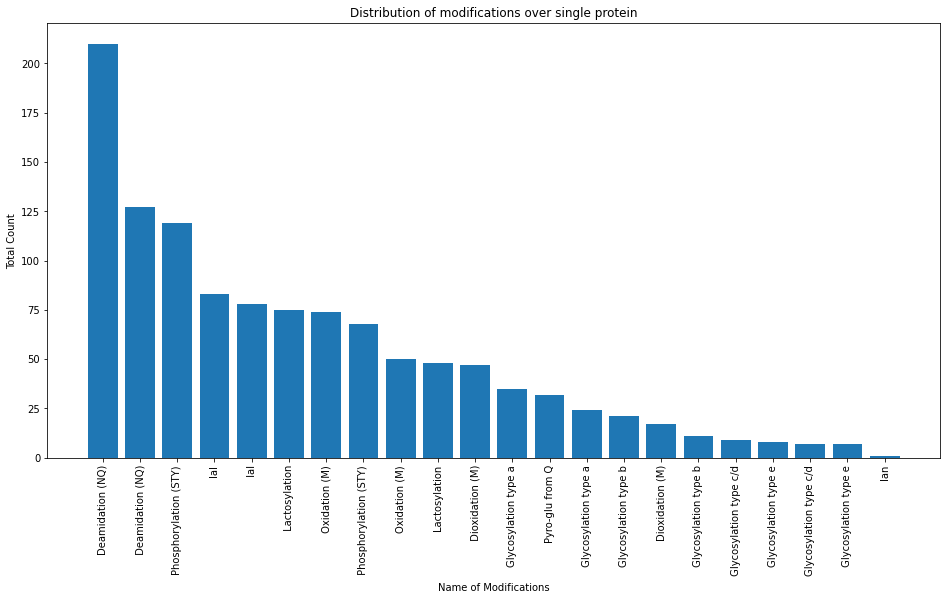

In [ ]:
plt.figure(figsize=(16,8))
plt.bar(differentModificationsByProtein["P02666"].keys(), differentModificationsByProtein["P02666"].values())
plt.title("Distribution of modifications over single protein")
plt.xlabel('Name of Modifications')
plt.ylabel('Total Count')
plt.xticks(rotation='vertical')

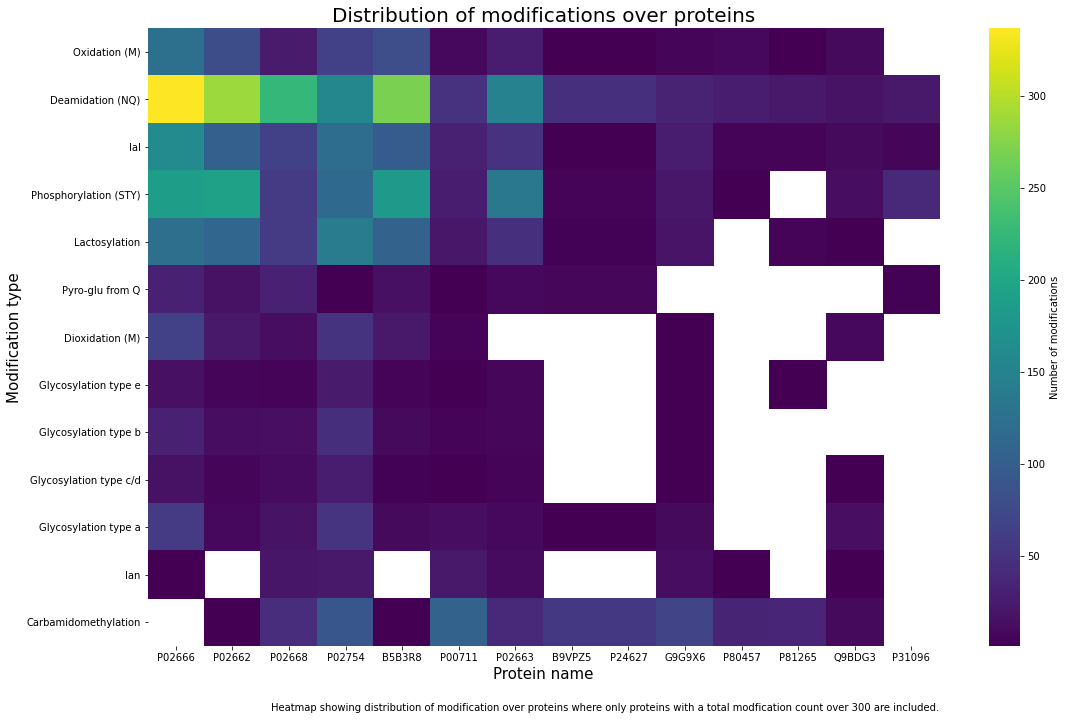

In [14]:
from utils import get_modification_count_per_protein
modPd = get_modification_count_per_protein(df, 50, "protein_total_mod_count")
plt.figure(figsize=(16,10))
ax = sns.heatmap(modPd, cmap="viridis", cbar_kws={'label': 'Number of modifications'})
plt.title('Distribution of modifications over proteins', fontsize = 20) # title with fontsize 20
plt.xlabel('Protein name', fontsize = 15) # x-axis label with fontsize 15
plt.ylabel('Modification type', fontsize = 15) # y-axis label with fontsize 15
ax.annotate('Heatmap showing distribution of modification over proteins where only proteins with a total modfication count over 300 are included.',
            xy = (1.0, -0.1),
            xycoords='axes fraction',
            ha='right',
            va="center",
            fontsize=10)

plt.tight_layout()
plt.show()

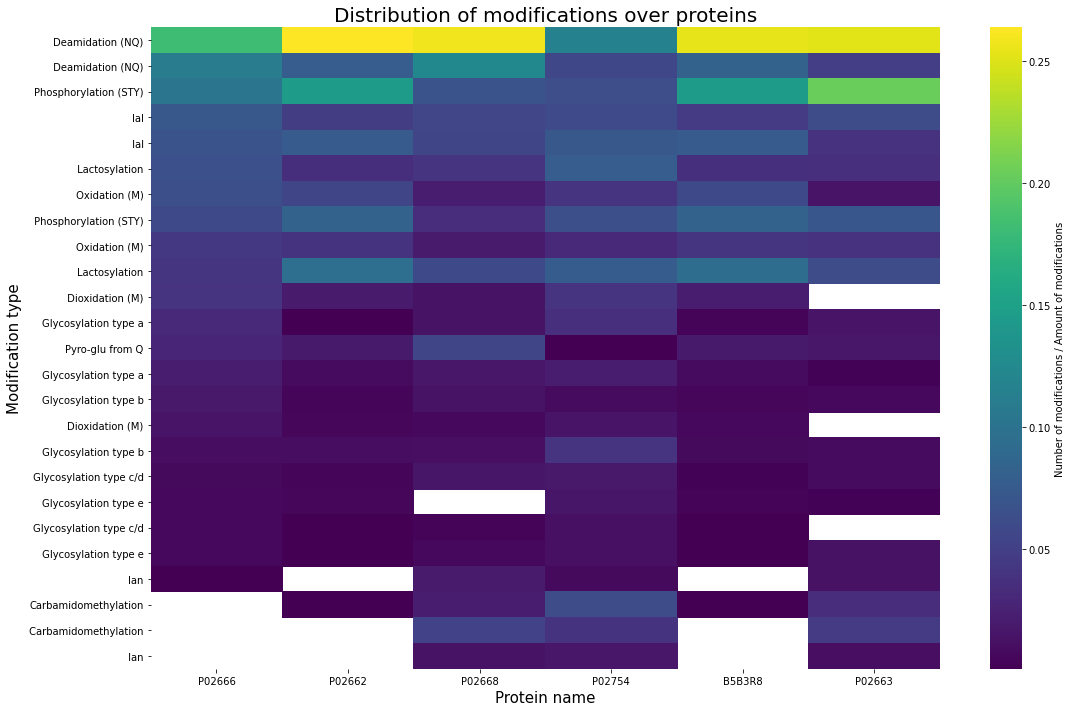

In [ ]:
differentModificationsByProteinCountOver500Normalized  = {}
for protein, mods in differentModificationsByProteinCountOver500.items():
    updateMods = {}
    for mod, count in mods.items():
        updateMods[mod] = count / totalProteinMods[protein]
    differentModificationsByProteinCountOver500Normalized[protein] = updateMods

modPdNorm = pd.DataFrame(differentModificationsByProteinCountOver500Normalized)
plt.figure(figsize=(16,10))
ax = sns.heatmap(modPdNorm, cmap="viridis", cbar_kws={'label': 'Number of modifications / Amount of modifications'})
plt.title('Distribution of modifications over proteins', fontsize = 20) # title with fontsize 20
plt.xlabel('Protein name', fontsize = 15) # x-axis label with fontsize 15
plt.ylabel('Modification type', fontsize = 15) # y-axis label with fontsize 15
plt.tight_layout()
plt.show()

In [ ]:
!pip install plotly==5.3.1

     |████████████████████████████████| 23.9 MB 18.4 MB/s 


In [ ]:
import plotly.express as px
import plotly.graph_objects as go

def df_to_plotly(df):
    return {'z': df.values.tolist(),
            'x': df.columns.tolist(),
            'y': df.index.tolist()}

#pd.options.plotting.backend = "plotly"
modPdNorm = pd.DataFrame(differentModificationsByProteinCountOver500Normalized)
fig = go.Figure(data=go.Heatmap(df_to_plotly(modPdNorm)))
fig.show()
